<a href="https://colab.research.google.com/github/nurfnick/Operations_Research/blob/main/Chapter2LinearProgramming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Programming





## Introduction






A local pillow company designs pillows especially for pregnant and nursing mothers.  There are two pillows that they produce referred here as large and small.  The large pillow requires six yards of fabric, one hour of sewing and eleven pounds of fill.  The small pillow requires seven yards of fabric, three hours of sewing and four pounds of fill.

The manager, trying to keep all of this straight creates a table.

|Pillow|Fabric|Sewing|Fill|
|:------:|:------:|:------:|:----:|
|Large |6     |1     |11   |
|Small |7     |3     |4   |

The manager being an astute business man, wants to limit inventory and labor.  Each week they can source 1370 yards of fabric and 1540 pounds of fill.  With a work crew that can do at most 540 hours of labour each week.  He adds this information to his table feeling very satisfied.

|Pillow|Fabric|Sewing|Fill|
|:------:|:------:|:------:|:----:|
|Large |6     |1     |11   |
|Small |7     |3     |4   |
|Weekly Max| 1370|540|1540|

Using some hueristics, the manager cranks out some pillows of each type every week.  One day an intrept intern asks, "Are we maximizing our profit?"  The large pillow sells for a $\$ $3 profit, while the small pillow sells for a $\$ $2 profit.  The intern adds this to the table but still does not know if they are maximizing profit.

|Pillow|Fabric|Sewing|Fill|Profit|
|:------:|:------:|:------:|:----:|:---:|
|Large |6     |1     |11   |3
|Small |7     |3     |4   |2
|Weekly Max| 1370|540|1540|???

The intern continues down this line of thought and comes up with a way to maximize the number of pillows produced.  They let $x$ be the number of large pillows and $y$ be the number of small pillows.  They create a system of inequalities:

$$
\left\{
\begin{array}{l}
6x+7y\leq 1370\\
x+3y\leq 540\\
11x+4y\leq 1540
\end{array}
\right.
$$

To graph this properly, we'll find the corner points.

In [15]:
import numpy as np

A = np.array([[6,7],[1,3],[11,4]])
b = np.array([1370,540,1540])

np.linalg.solve(A[0:2,:],b[0:2])

array([ 30., 170.])

In [16]:
np.linalg.solve(A[1:3,:],b[1:3])

array([ 84.82758621, 151.72413793])

In [17]:
np.linalg.solve(A[[0,2],:],b[[0,2]])

array([100., 110.])

Three lines will have three intersections $\binom32=3$ We note that the intersection point of the first line and the third line is outside of the feasible region by the second line.  A graph of the feasible set is provided below. 

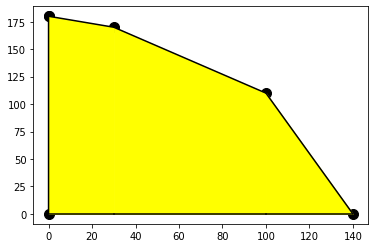

In [29]:
import matplotlib.pyplot as plt

x1= np.arange(0,30,.1)
x2= np.arange(30,100,.1)
x3 = np.arange(100,140,.1)


y1 = (540-1*x1)/3
y2 = (1370-6*x2)/7
y3 = (1540-11*x3)/4

plt.plot(x1,y1, color = "black")
plt.plot(x2,y2, color = "black")
plt.plot(x3,y3, color = "black")
plt.plot(x1,np.zeros(300),x2,np.zeros(700),x3,np.zeros(400), color = "black")
plt.plot(np.zeros(1800),np.arange(0,180,.1),color = "black")
plt.scatter(30,170, s = 100, color = "black")
plt.scatter(100,110, s = 100, color = "black")
plt.scatter(0,180, s = 100, color = "black")
plt.scatter(140,0, s = 100, color = "black")
plt.scatter(0,180, s = 100, color = "black")
plt.scatter(0,0, s = 100, color = "black")
plt.fill_between(x1,0,y1, color = "yellow")
plt.fill_between(x2,0,y2, color = "yellow")
plt.fill_between(x3,0,y3, color = "yellow")

We should also note that there are corner points at the intersection of the vertical line $x = 0$ and the horizontal line $y=0$ including where those two lines intersect.  The $y$-intercept is found by solving for $y$ in the sewing equation when $x=0$.  The $x$-intercept is found by solving for $y$ in the fill equation when $y=0$.

So the intern now knows that any point inside this region is what is possible in any given week!  Now we ask, how to maximize the profit?  Let's get an equation in terms of our set up!

$$
P= 3x+2y
$$

We can pick some values for $P$ and see what happens.  

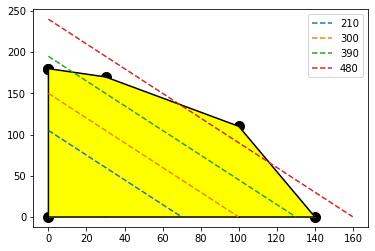

In [30]:
x1= np.arange(0,30,.1)
x2= np.arange(30,100,.1)
x3 = np.arange(100,140,.1)
x4 = np.arange(0,70,.1)
x5 = np.arange(0,100,.1)
x6 = np.arange(0,130,.1)
x7 = np.arange(0,160,.1)

y1 = (540-1*x1)/3
y2 = (1370-6*x2)/7
y3 = (1540-11*x3)/4

plt.plot(x1,y1, color = "black")
plt.plot(x2,y2, color = "black")
plt.plot(x3,y3, color = "black")
plt.plot(x1,np.zeros(300),x2,np.zeros(700),x3,np.zeros(400), color = "black")
plt.plot(np.zeros(1800),np.arange(0,180,.1),color = "black")
plt.scatter(30,170, s = 100, color = "black")
plt.scatter(100,110, s = 100, color = "black")
plt.scatter(0,180, s = 100, color = "black")
plt.scatter(140,0, s = 100, color = "black")
plt.scatter(0,180, s = 100, color = "black")
plt.scatter(0,0, s = 100, color = "black")
plt.fill_between(x1,0,y1, color = "yellow")
plt.fill_between(x2,0,y2, color = "yellow")
plt.fill_between(x3,0,y3, color = "yellow")

plt.plot(x4,(210-3*x4)/2,linestyle = "dashed", label = "210")
plt.plot(x5,(300-3*x5)/2,linestyle = "dashed", label = "300")
plt.plot(x6,(390-3*x6)/2,linestyle = "dashed", label = "390")
plt.plot(x7,(480-3*x7)/2,linestyle = "dashed", label = "480")
plt.legend()
plt.show()


We can see that for each of the $P$ values I selected there are some options for the day.  We should also notice that the corner point looks like it will produce a line that just touches it!

$$
P = 3x + 2y = 3\cdot100+2\cdot110 = 520
$$

We'll graph that one and see!

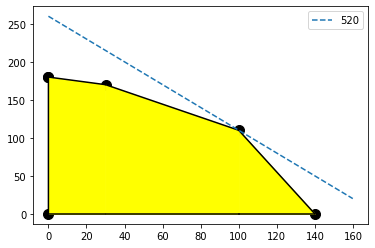

In [31]:
x1= np.arange(0,30,.1)
x2= np.arange(30,100,.1)
x3 = np.arange(100,140,.1)
x4 = np.arange(0,70,.1)
x5 = np.arange(0,100,.1)
x6 = np.arange(0,130,.1)
x7 = np.arange(0,160,.1)

y1 = (540-1*x1)/3
y2 = (1370-6*x2)/7
y3 = (1540-11*x3)/4

plt.plot(x1,y1, color = "black")
plt.plot(x2,y2, color = "black")
plt.plot(x3,y3, color = "black")
plt.plot(x1,np.zeros(300),x2,np.zeros(700),x3,np.zeros(400), color = "black")
plt.plot(np.zeros(1800),np.arange(0,180,.1),color = "black")
plt.scatter(30,170, s = 100, color = "black")
plt.scatter(100,110, s = 100, color = "black")
plt.scatter(0,180, s = 100, color = "black")
plt.scatter(140,0, s = 100, color = "black")
plt.scatter(0,180, s = 100, color = "black")
plt.scatter(0,0, s = 100, color = "black")
plt.fill_between(x1,0,y1, color = "yellow")
plt.fill_between(x2,0,y2, color = "yellow")
plt.fill_between(x3,0,y3, color = "yellow")


plt.plot(x7,(520-3*x7)/2,linestyle = "dashed", label = "520")
plt.legend()
plt.show()

Triuphantly the intern tells the boss that we can maximize profits by making 100 large pillows and 110 small pillows!

## Theory

The theory of linear programming can be stated in terms of the contraints and the objective function.  For a system of linear constraints and linear objective functions, the optimum values (minimum or maximum) will occur on the corner points of the feasible set described by the contraining function.

If we consider that the feasible set of the constraining lines, it will create a polygon with sharp corners.  The linear objective function will cut through the polygon.  Any optimum point will be at one of the corners as the objective function just kisses the edge.

Some care must be taken for unbounded feasible sets, an optimum solution may not be possible with the maximum (or minimum) going to infinity (negative infinity).

### Slack

All of the inequalities in the constraint must be met but some will not be on their strict bounds.  This leaves **slack** in those inequalities.  Using our original problem as an example, we see that the sewing equation has some slack.  We could have done more sewing with the maximum profit $(100,110)$. 
$$
x+3y = 100 +330 = 430\leq 540
$$
The inequality is solved but 100 more hours of sewing are available each week.  This is slack in our solution.  

The previous problem can actually be restated in terms of slack with the inequalities replaced with equalities.  
$$
\left\{
\begin{array}{l}
6x+7y+s_1 =  1370\\
x+3y +s_2 = 540\\
11x+4y+ s_3 =  1540
\end{array}
\right.
$$

In the optimum solution $s_2=110$ and $s_1=s_3=0$.  For the inequalities to continue to hold we must ask that $s_1,s_2,s_3\geq 0$.

Actually this insight gives us an alternative approach to solve linear programming problems.  If we restate the contraint in equation form with slack variables, we can formulate the theory as solutions to the system of equations with some of the slack variables set to zero.  Let's see that in action here.

Since I have three equations, I'll be able to get a unique solution if I have three variables.  Currently I have 5, $x,y,s_1,s_2,s_3$.  If we set two of them equal to zero then we will be able to solve the system!



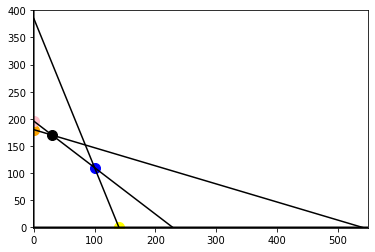

In [57]:

x = np.arange(0,550,.1)

y1 = (540-1*x)/3
y2 = (1370-6*x)/7
y3 = (1540-11*x)/4

plt.plot(x,y1, color = "black")
plt.plot(x,y2, color = "black")
plt.plot(x,y3, color = "black")
plt.plot(x,np.zeros(5500), color = "black")
plt.plot(np.zeros(5500),x, color = "black")
plt.scatter(30,170, s = 100, color = "black")
plt.scatter(100,110, s = 100, color = "blue")
plt.scatter(140,0, s = 100, color = "yellow")
plt.scatter(0,180, s = 100, color = "orange")
plt.scatter(0,195.7, s = 100, color = "pink")
plt.xlim([-1,550])
plt.ylim([-1,400])


plt.show()

1. $x=y=0$ This is the orgin in my graph, each slack is it's value and we achieve no profit, $P = \$0$
2. $x = s_1 = 0$ This is the *pink* point that falls outside of the feasible set.
3. $x= s_2 = 0$ This is the *orange* point falling inside the feasible set with a profit of $P = 180*2 = \$360$
4. $x = s_3 =0$
5. $y = s_1 = 0$
6. $y = s_2 = 0$
7. $y = s_3 = 0$
8. $s_1 = s_2 = 0$
9. $s_1 = s_3 = 0$ This was the optimal *blue* point
10. $s_2 = s_3 =0$ Intersection of lines outside the feasible set

How do we know we got them all?  We had 5 variables $(x,y,s_1,s_2,s_3)$ and were trying to solve 3 equations.  So we were able to have $\binom 52 = \binom 53 =10$.  Let's write up a little program that evaluates each of these for us!

Before we proceed, we should ask is there a quick way to tell if an intersection is outside of the feasible set.  Let's look at the *pink* point.  It has $x = s_1 = 0$  Let's ask python to solve that.

I'll need to expand $A$ to include the slack variables.  Just remeber there will be a lot of zeros!  If I don't need $x$ and $s_1$, I'll only need the $y, s_2,$ and $s_3$ variables.

In [43]:
A = np.array([[6,7,1,0,0],[1,3,0,1,0],[11,4,0,0,1]])

A[:,[1,3,4]]


array([[7, 0, 0],
       [3, 1, 0],
       [4, 0, 1]])

Now I solve it with the original $b$.

In [44]:
np.linalg.solve(A[:,[1,3,4]],b)

array([195.71428571, -47.14285714, 757.14285714])

The issue is that the second slack variable $s_2$ is negative!  The slack is about how much extra we have, if we don't have extra but used too much, we'll get negatives and that is not allowed.  Let's write a little code to reassemble our variables.

In [53]:
def buildFullList(indexref,solution):
  newlist =[]
  solutioncounter = 0
  for j in range(5):
    if j not in indexref:
      newlist.append(0)
    else:
      newlist.append(solution[solutioncounter])
      solutioncounter += 1
  return newlist

indexref = [1,3,4]
solution = np.linalg.solve(A[:,[1,3,4]],b)

allVariables = buildFullList(indexref,solution)

allVariables

[0, 195.71428571428572, 0, -47.14285714285711, 757.1428571428572]

Now I want to check for negatives!

In [47]:
def testForFeasible(list1):
  return all([i>=0 for i in list1])

testForFeasible(allVariables)

False

We see this is not in the feasible set.  Let's do one more thing and compute the profit from this list.  I know this isn't possible but we'll need this function soon!

In [48]:
def profit(list):
  return 3*list[0]+2*list[1]

profit(allVariables)

391.42857142857144

Now I am going to put it all together and build a little table that looks at all 10 points in the order I presented them above.

In [59]:
index = [[i,j,k] for i in range(5) for j in range(i+1,5) for k in range(j+1,5)] #which variables are not zero
d = {0:'large',1:'small',2:'slackFabric',3:'slackSewing',4:'slackfill'} #dictionary for keeping variable labels straight

X = []
for i in index:
  solution = [round(i,5) for i in np.linalg.solve(A[:,i],b)]
  list1 = buildFullList(i,solution)
  X.append([(d[i[0]],d[i[1]],d[i[2]]),solution,profit(list1),testForFeasible(list1)])

I'll print the data in a nice table with headers

In [61]:
import pandas as pd

X = pd.DataFrame(X,columns = ['Variables Used','Solution','Profit','In Feasible'])
X

,Variables Used,Solution,Profit,In Feasible
0,"(large, small, slackFabric)","[84.82759, 151.72414, -201.03448]",557.93105,False
1,"(large, small, slackSewing)","[100.0, 110.0, 110.0]",520.00000,True
2,"(large, small, slackfill)","[30.0, 170.0, 530.0]",430.00000,True
3,"(large, slackFabric, slackSewing)","[140.0, 530.0, 400.0]",420.00000,True
4,"(large, slackFabric, slackfill)","[540.0, -1870.0, -4400.0]",1620.00000,False
5,"(large, slackSewing, slackfill)","[228.33333, 311.66667, -971.66667]",684.99999,False
6,"(small, slackFabric, slackSewing)","[385.0, -1325.0, -615.0]",770.00000,False
7,"(small, slackFabric, slackfill)","[180.0, 110.0, 820.0]",360.00000,True
8,"(small, slackSewing, slackfill)","[195.71429, -47.14286, 757.14286]",391.42858,False
9,"(slackFabric, slackSewing, slackfill)","[1370.0, 540.0, 1540.0]",0.00000,True


Lastly I'll use some manipulation to print the maximum inside the feasible set.  First I restrict to in the feasible set, then I'll search for the maximum entry of profit.

In [65]:
XFeasible = X[X['In Feasible'] == True]

XFeasible

,Variables Used,Solution,Profit,In Feasible
1,"(large, small, slackSewing)","[100.0, 110.0, 110.0]",520.0,True
2,"(large, small, slackfill)","[30.0, 170.0, 530.0]",430.0,True
3,"(large, slackFabric, slackSewing)","[140.0, 530.0, 400.0]",420.0,True
7,"(small, slackFabric, slackfill)","[180.0, 110.0, 820.0]",360.0,True
9,"(slackFabric, slackSewing, slackfill)","[1370.0, 540.0, 1540.0]",0.0,True


In [66]:
XFeasible[XFeasible['Profit'].max()==XFeasible['Profit']]

,Variables Used,Solution,Profit,In Feasible
1,"(large, small, slackSewing)","[100.0, 110.0, 110.0]",520.0,True


This gives us exactly the solution we found graphically but an algorithmic way to find it!

## Examples

### Example 1

Repeat the original question using python's tools for solving *Linear Programming* or **LP** problems.  I'll use a tool from ```scipy.optimize```  The first issue is that it only minimizes!  So I'll need to convert my statement to minimize but this is easy, just multiply your objective function by negative one.



In [69]:
from scipy.optimize import linprog

linprog([-3,-2],A[:,[0,1]],b)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


     con: array([], dtype=float64)
     fun: -519.999999895085
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([3.18975481e-07, 1.10000000e+02, 2.63415814e-07])
  status: 0
 success: True
       x: array([ 99.99999999, 109.99999996])

We can see that there is some ambiguity with the results being what we expected **if** we round.  We consider that as part of the quickness and allow for that, afterall we could not create less than a full pillow!

### Example 2

## References

*How to Solve It* **G. Polya** Second Edition Princeton University Press 1957

*Thinking Mathematically* **J. Mason** Addison-Wesley Publishing Company 1985

*Grit: The Power of Passion and Perseverance* **A. Duckworth** ‎ Scribner Book Company 2016



## Problems

## Project Idea